# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [73]:
data = pd.read_csv("/content/data_clustering.csv")
df = pd.DataFrame(data)
df.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,1,19,15000,39,5,1,4,2
1,1,21,35000,81,2,3,3,2
2,0,20,86000,6,2,1,1,0
3,0,23,59000,77,7,0,2,2
4,0,31,38000,40,3,2,6,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [74]:
X = data.drop(columns=['Cluster'])
y = data['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [75]:
nb = GaussianNB().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
print(nb.score(X_train , y_train))
print(svm.score(X_train , y_train))

0.988125
0.995


Algoritma klasifikasi yang digunakan adalah Naive Bayes dan Support Vector Machine karena Naive Bayes memiliki kelebihan dalam menangani data dengan banyak fitur dan membuat model yang cepat serta efisien. Kemudian Support Vector Machine juga memiliki Kemampuan Menangani Data Non-Linier.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

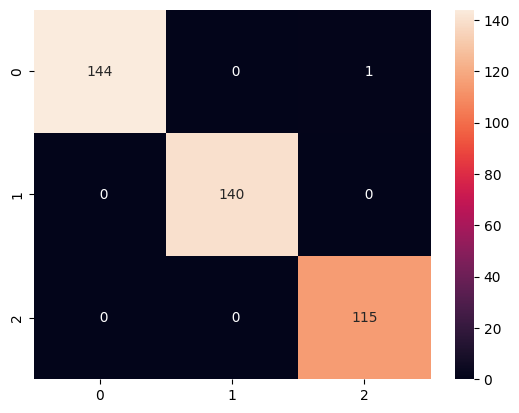

In [76]:
nb_pred = nb.predict(X_test)
nb_cm = confusion_matrix(y_test , nb_pred)
sns.heatmap(nb_cm, annot=True,fmt='3g')
plt.show()

In [77]:
Accuracy = accuracy_score(y_test , nb_pred)
f1 = f1_score(y_test , nb_pred , average='weighted')
precision = precision_score(y_test , nb_pred , average='weighted')
recall = recall_score(y_test , nb_pred , average='weighted')
print(Accuracy)
print(f1)
print(precision)
print(recall)

0.9975
0.9975010859958957
0.9975215517241379
0.9975


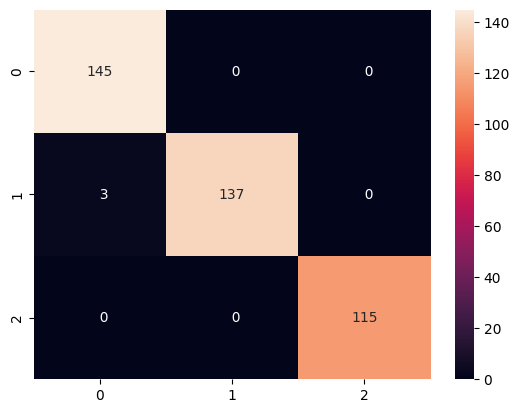

In [78]:
svm_pred = svm.predict(X_test)
svm_cm = confusion_matrix(y_test , svm_pred)
sns.heatmap(svm_cm, annot=True,fmt='3g')
plt.show()

In [79]:
Accuracy = accuracy_score(y_test , svm_pred)
f1 = f1_score(y_test , svm_pred , average='weighted')
precision = precision_score(y_test , svm_pred , average='weighted')
recall = recall_score(y_test , svm_pred , average='weighted')
print(Accuracy)
print(f1)
print(precision)
print(recall)

0.9925
0.9924977821860252
0.992652027027027
0.9925


- Naive Bayes memiliki akurasi sebesar 99.75%, sedangkan SVM memiliki akurasi sebesar 99.25%
- Naive Bayes menunjukkan precision sebesar 99.75%, sedangkan SVM memiliki precision sedikit lebih rendah yaitu 99.27%.
- Naive Bayes dan SVM memiliki recall masing-masing 99.75% dan 99.25%.
- Naive Bayes memiliki F1-score sebesar 99.75%, sedangkan SVM memiliki F1-score sebesar 99.25%.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [80]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [81]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

**Rekomendasi**
- Naive Bayes unggul di semua metrik evaluasi, meskipun selisihnya sangat kecil. Jika akurasi menjadi prioritas utama dan model cepat diimplementasikan, Naive Bayes adalah pilihan yang sangat baik.
- SVM juga merupakan model yang andal, namun lebih cocok jika dataset memiliki kompleksitas tinggi atau pola yang tidak linier. SVM mungkin lebih relevan jika ada kebutuhan untuk generalisasi lebih baik pada data yang lebih bervariasi.